In [ ]:
import pandas as pd #biblioteca de leituraetratamento de dataframes
#lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv',sep=';',encoding='latin-1')

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [ ]:
idade = pd.read_csv('idade_clientes.csv',sep=';',encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.dropna(subset = ['pais'], inplace = True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [ ]:
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [ ]:
media


143.4409594095941

In [ ]:
mediana

140.0

In [ ]:
clientes.dropna(subset = ['peso'], inplace = True)

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt


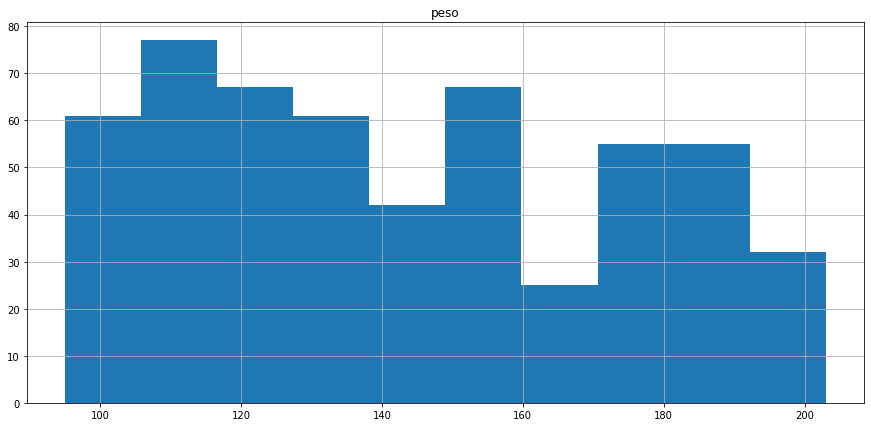

In [ ]:
clientes.hist(column = 'peso',figsize = (15,7))
plt.show()

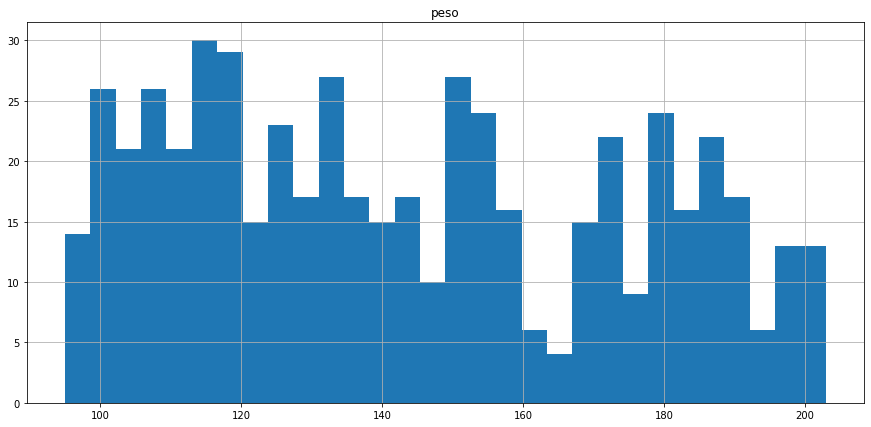

In [ ]:
clientes.hist(column = 'peso',figsize = (15,7), bins = 30)
plt.show()

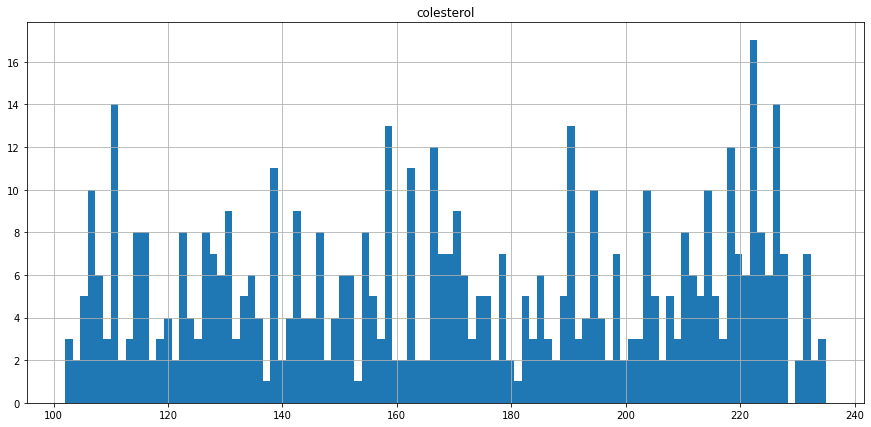

In [ ]:
clientes.hist(column = 'colesterol',figsize = (15,7), bins = 100)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b081074d0>]],
      dtype=object)

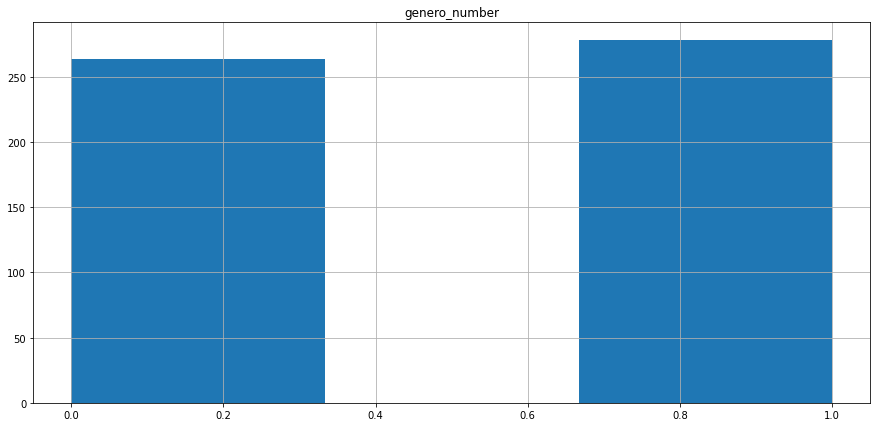

In [ ]:
clientes.hist(column ='genero_number', figsize = (15,7),bins = 3)


In [ ]:
clientes_estados = pd.merge(clientes,estados,on ='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
base_completa = pd.merge(clientes_estados,idade,on='id_cliente').sort_values('id_cliente')
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)


,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.rename(columns={'id_cliente':'cod_cliente', 'genero_number':'cod_genero'},inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()


In [ ]:
base_completa = base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']].reset_index(drop=True)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
    wcss=[]
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_cliente = base_completa[['peso','colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)
wcss_clientes

[1248240.6686746986,
 298932.7377352369,
 127842.60787249672,
 73809.93553059456,
 49068.8738718445,
 34064.50002100837,
 25079.92393550797,
 20378.05126656164,
 16003.657266380145,
 13385.38391038145]

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'o cluster[i]possui valor de WCSS de:{wcss_clientes[i]}')

o cluster[i]possui valor de WCSS de:1248240.6686746986
o cluster[i]possui valor de WCSS de:298932.7377352369
o cluster[i]possui valor de WCSS de:127842.60787249672
o cluster[i]possui valor de WCSS de:73809.93553059456
o cluster[i]possui valor de WCSS de:49068.8738718445
o cluster[i]possui valor de WCSS de:34064.50002100837
o cluster[i]possui valor de WCSS de:25079.92393550797
o cluster[i]possui valor de WCSS de:20378.05126656164
o cluster[i]possui valor de WCSS de:16003.657266380145
o cluster[i]possui valor de WCSS de:13385.38391038145


In [ ]:
import plotly.express  as px#Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criaçãoeconcatenização de graficos

In [ ]:
grafico_wcss = px.line(x= range(1,11),
                       y=wcss_clientes
                      )
fig = go.Figure(grafico_wcss)
fig.update_layout(title='CalculandooWCSS',
                  xaxis_title='Número de clusters',
                  yaxis_title='valor do wcss',
                  template='plotly_white'
                 )
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4,random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [ ]:
grafico = px.scatter(x= base_completa['peso'],
                           y = base_completa['colesterol'],
                           color= base_completa['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1],size=[7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                    y = base_completa['colesterol'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de clusters',
                 xaxis_title='peso',
                 yaxis_title='colesterol',
                 )
fig.show()

In [ ]:
def plotar_grafico(x, y, xlabel, y_label):
  grafico = px.scatter(x=x,
                       y=y,
                       color = base_completa['cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title='Análise de clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,)
  fig.show()

In [ ]:
plotar_grafico(base_completa['peso'],base_completa['colesterol'],'peso','colesterol')

In [ ]:
plotar_grafico(base_completa['colesterol'],base_completa['peso'],'colesterol','peso')

In [ ]:
plotar_grafico(base_completa['idade'],base_completa['colesterol'],'idade','colesterol')

In [ ]:
plotar_grafico(base_completa['idade'],base_completa['peso'],'idade','peso')

In [ ]:
cluster_clientes = base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] ='Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] ='Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] ='Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] ='Risco Moderado alto'

In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado baixo


In [ ]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()


,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [ ]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Minas Gerais"')


,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
72,78,Feminino,34,185.0,220,13,Minas Gerais,MG,Brasil,0,Alto Risco
154,171,Feminino,55,168.0,204,13,Minas Gerais,MG,Brasil,0,Alto Risco
212,236,Masculino,25,201.0,228,13,Minas Gerais,MG,Brasil,0,Alto Risco
330,363,Masculino,28,172.0,211,13,Minas Gerais,MG,Brasil,0,Alto Risco
384,423,Feminino,48,188.0,226,13,Minas Gerais,MG,Brasil,0,Alto Risco
458,505,Masculino,59,173.0,212,13,Minas Gerais,MG,Brasil,0,Alto Risco


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

In [ ]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';',encoding = 'latin1')
